# Correlation and Regression


- Correlation not equal causality
https://www.businessinsider.de/international/chocolate-consumption-vs-nobel-prizes-2014-4/?r=US&IR=T


- Spurious correlation https://www.tylervigen.com/spurious-correlations


Boston housing data set:
- Description https://www.kaggle.com/vikrishnan/boston-house-prices/activity
- Download source http://course1.winona.edu/bdeppa/Stat%20425/Datasets.html

In [28]:
import pandas as pd
import scipy.stats
import seaborn as sns

In [5]:
boston_housing = pd.read_csv("http://course1.winona.edu/bdeppa/Stat%20425/Data/Boston_Housing.csv")

In [6]:
boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

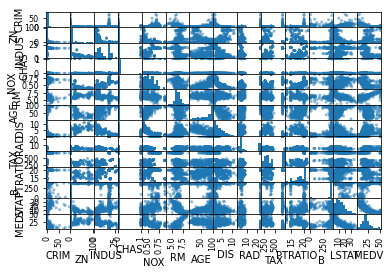

In [9]:
ax = pd.plotting.scatter_matrix(boston_housing)

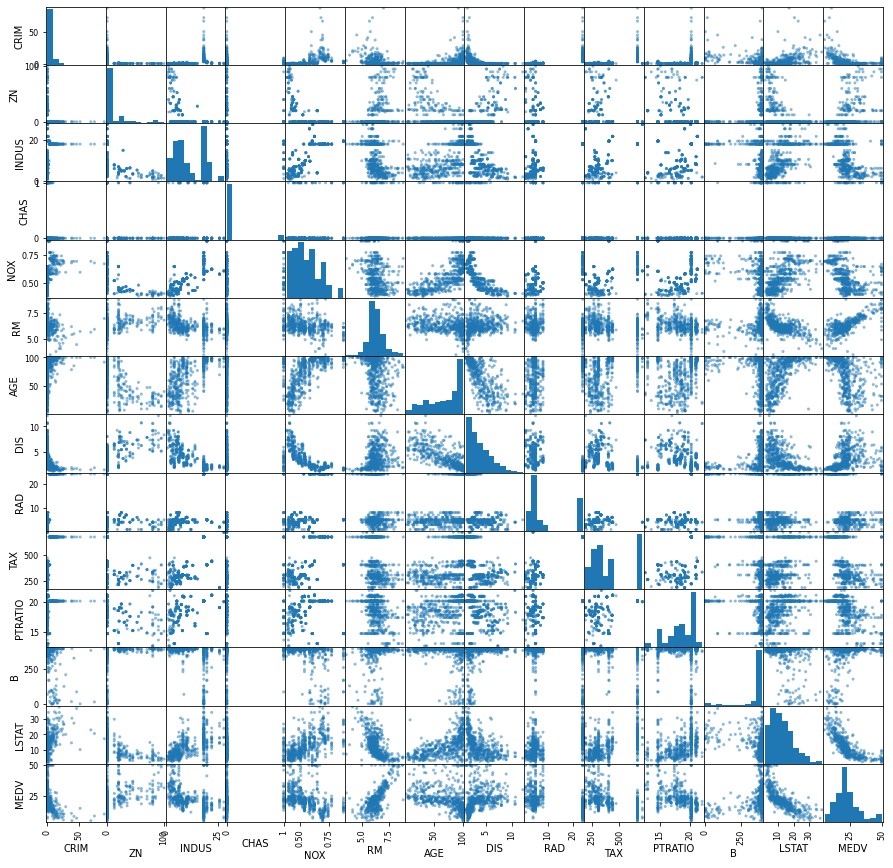

In [10]:
ax = pd.plotting.scatter_matrix(boston_housing, figsize=(15, 15))

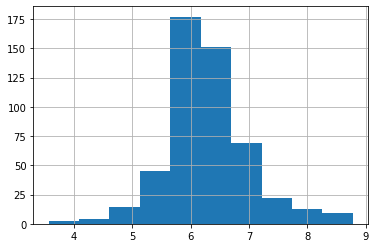

In [11]:
boston_housing.RM.hist()

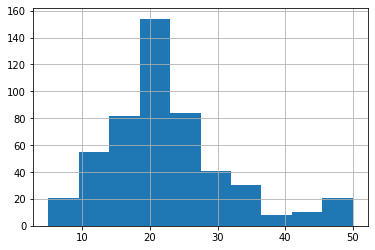

In [12]:
boston_housing.MEDV.hist()

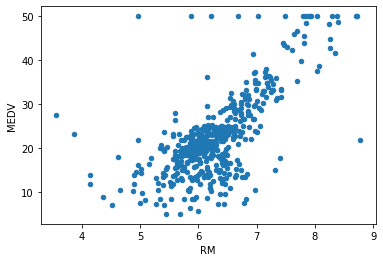

In [19]:
boston_housing.plot(x="RM", y="MEDV", kind="scatter")

In [20]:
scipy.stats.pearsonr(boston_housing.MEDV, boston_housing.RM)

(0.6953599470715395, 2.4872288710071593e-74)

In [21]:
scipy.stats.spearmanr(boston_housing.MEDV, boston_housing.RM)

SpearmanrResult(correlation=0.6335764254337745, pvalue=3.822976266954402e-58)

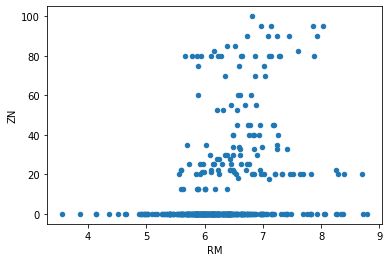

In [23]:
boston_housing.plot(x="RM", y="ZN", kind="scatter")

In [25]:
scipy.stats.pearsonr(boston_housing.MEDV, boston_housing.ZN)

(0.36044534245054316, 5.713584153079442e-17)

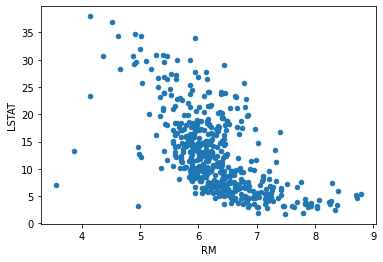

In [26]:
boston_housing.plot(x="RM", y="LSTAT", kind="scatter")

In [27]:
scipy.stats.pearsonr(boston_housing.MEDV, boston_housing.LSTAT)

(-0.737662726174015, 5.081103394386392e-88)

## Linear Regression

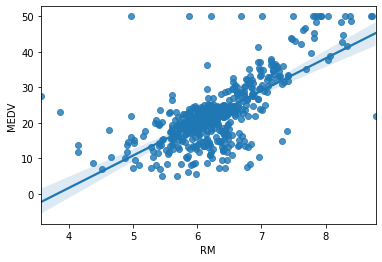

In [32]:
ax = sns.regplot(x=boston_housing.RM, y=boston_housing.MEDV)

(0.0, 10.0)

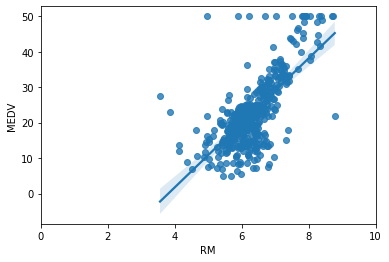

In [34]:
ax = sns.regplot(x=boston_housing.RM, y=boston_housing.MEDV)
ax.set_xlim([0, 10])

In [36]:
scipy.stats.linregress(x=boston_housing.RM, y=boston_housing.MEDV)

LinregressResult(slope=9.102108981180306, intercept=-34.67062077643854, rvalue=0.6953599470715393, pvalue=2.4872288710079515e-74, stderr=0.4190265601213402)

In [37]:
# With the formular we can predict MEDV values for a given RM

In [44]:
rooms = 8
price = -34.67062077643854 + rooms * 9.102108981180306 
print(price)

38.14625107300391


In [46]:
rooms = 10
price = -34.67062077643854 + rooms * 9.102108981180306 
print(price)

56.350469035364526
